Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]
[[1, 242.0], [1, 290.0], [1, 340.0], [1, 363.0], [1, 430.0], [1, 450.0], [1, 50

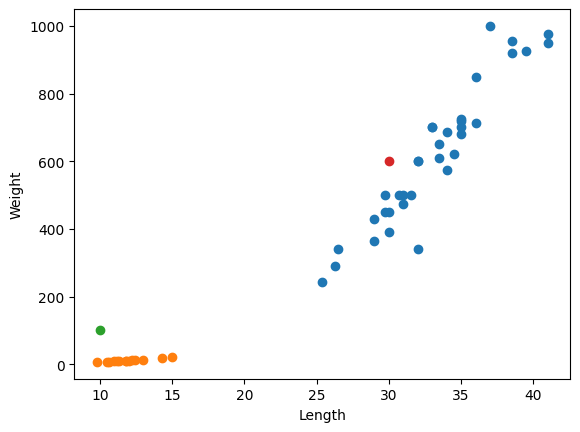

In [30]:
import numpy as np #numpy 패키지 가져오기
import matplotlib.pyplot as plt #시각화 패키지 가져오기

import pandas as pd #csv를 DataFrame으로 변환

from google.colab import drive #구글 colab를 사용하게 되어 구글 드라이브에서 데이터를 불러오기 위해 마운트
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/MachineLearning/Fish.csv')
print(data)

#도미 데이터 준비하기
bream_dataset = data[data.Species == 'Bream']
bream_length = [ i for i in bream_dataset.Length2]
bream_weight = [ j for j in bream_dataset.Weight]

#빙어 데이터 준비하기
smelt_dataset = data[data.Species == 'Smelt']
smelt_length = [ j for j in smelt_dataset.Length2]
smelt_weight = [ j for j in smelt_dataset.Weight]

#도미와 빙어 데이터를 하나의 데이터로 병합
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

#2차원 리스트 만들기
#사이킷런은 머신러닝 패키지로 2차원 리스트를 필요로 한다.
#도미와 빙어의 길이, 무게가 하나의 리스트를 구성하고 이 리스트들이 모여 전체 리스트를 만든다
fish_data = [[1, w] for l, w in zip(length, weight)]
print(fish_data)

#정답 데이터 준비
#어떤게 도미, 빙어인지 학습시킬 필요가 있다 그래서 도미를 1로 빙어를 0으로 표현
fish_target = [1] * 35 + [0] * 14
print(fish_target)

#K-NN을 통해 모델 학습 후 정확도를 확인
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10)

kn.fit(fish_data, fish_target) #모델 학습시키기
kn.score(fish_data, fish_target) #정확도 


plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(10, 100)
plt.scatter(30, 600)

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()


